Since notebooks live in its own directory, I need to setup import path correctly.

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
voc_root = os.path.join(project_root, "data", "VOC2012")

Import relevant classes.

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from data import VOCDataset

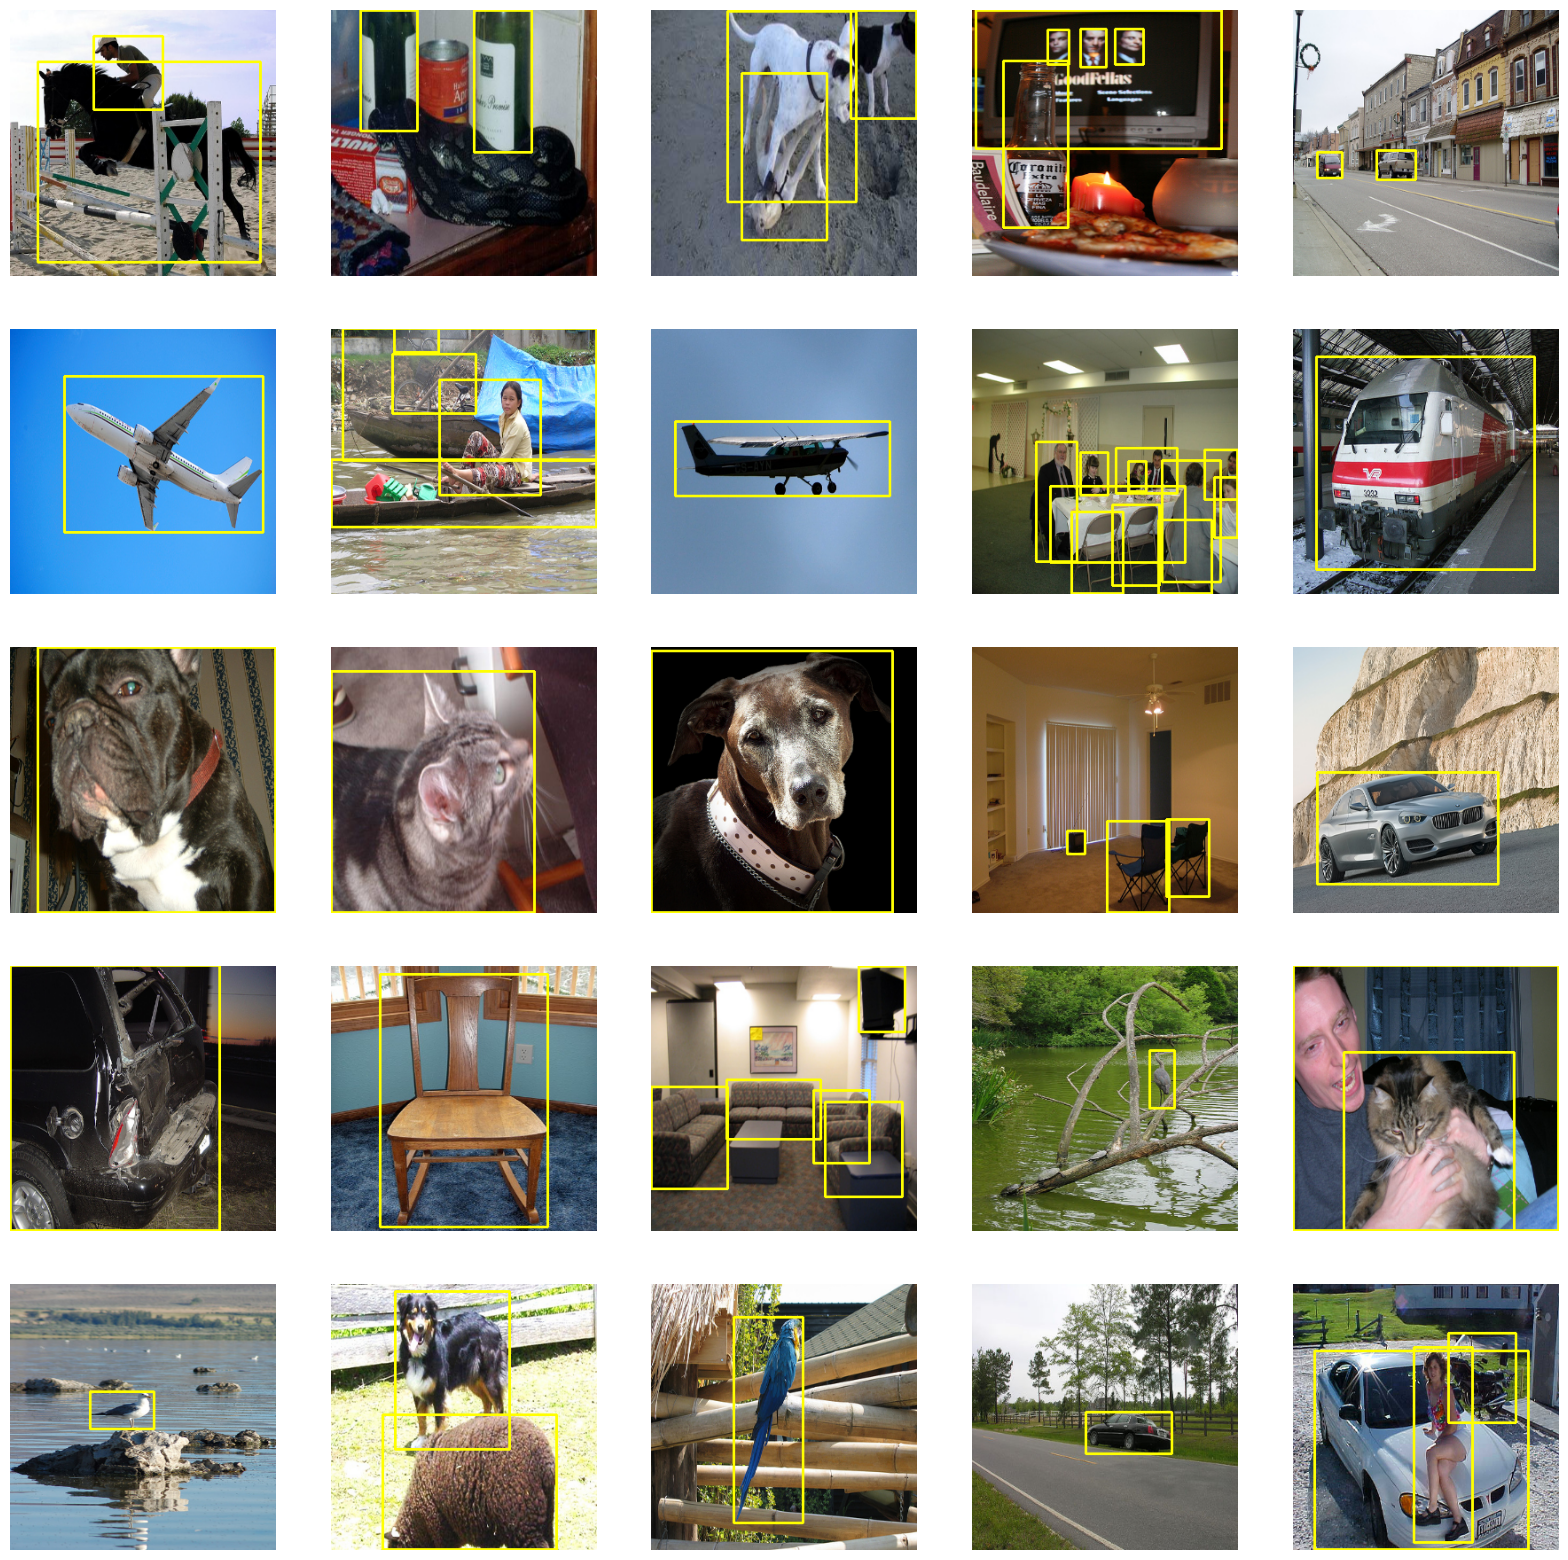

In [36]:
dataset = VOCDataset(root=voc_root)

num_rows = 5
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
for i in range(num_rows * num_cols):
    img_tensor, gt = dataset[i]
    img = img_tensor.permute(1, 2, 0).contiguous().cpu().numpy() * 255
    img = img.astype(np.uint8)
    height, width, _ = img.shape
    for bbox in gt:
        xmin, ymin, xmax, ymax, label = bbox
        umin, vmin = int(xmin * width), int(ymin * height)
        umax, vmax = int(xmax * width), int(ymax * height)
        cv2.rectangle(img, (umin, vmin), (umax, vmax), color=(255, 255, 0), thickness=2)
    axs[i // num_cols][i % num_cols].imshow(img)
    axs[i // num_cols][i % num_cols].axis('off')